In [1]:
# Importing Important libraries
import numpy as np # For Scientific Computation
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Fetching of data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Retrieving features and labels
X = mnist['data']
Y = mnist['target']

In [4]:
# Converting into NumPy array with integer datatype
X = np.array(X , dtype = 'int32')
Y = np.array(Y , dtype = 'int32')

In [5]:
# Reshaping
Y = Y.reshape(1,70000)
X = X.reshape(70000,-1).T
print(X.shape)

(784, 70000)


In [6]:
Lets_plot = X[:,60000]
Lets_plot_image = Lets_plot.reshape(28,28)
print(Lets_plot_image.shape)

(28, 28)


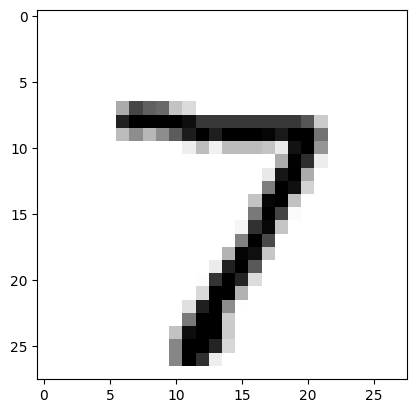

In [7]:
plt.imshow(Lets_plot_image, cmap = matplotlib.cm.binary, interpolation = "nearest")

In [8]:
Y[:,60000]

array([7], dtype=int32)

In [9]:
X_train = X[:,:60000]
X_test  = X[:,60000:]
Y_train = Y[:,:60000]
Y_test  = Y[:,60000:]
X_train = X_train
X_test = X_test
X_train = X_train / 255
X_test = X_test / 255
Y_train.size

60000

In [22]:
def initialize_parameters():
  W1 = np.random.randn(16,784) * 0.01
  W2 = np.random.randn(10,16)  * 0.01
  b1 = np.zeros((16,1))
  b2 = np.zeros((10,1))
  # parameters = {
  #     "W1": W1,
  #     "b1": b1,
  #     "W2": W2,
  #     "b2": b2}
  return W1, b1, W2, b2


In [11]:
def ReLU(Z):
  return np.maximum(Z, 0)

def SoftMax(Z2):
  A = np.exp(Z2) / np.sum(np.exp(Z2), axis = 0, keepdims = True)
  return A

def forward_propagation(W1, b1, W2, b2,X):
  Z1 = np.dot(W1,X) + b1
  A1 = ReLU(Z1)
  Z2 = np.dot(W2,A1) + b2
  A2 = SoftMax(Z2)
  return Z1, A1, Z2, A2


In [30]:
def compute_cost(A2, Y):
  m = Y.size
  cost = -1/m * np.sum(Y*np.log(A2))
  return cost

In [26]:
def one_hot(Y):
  encoded_array = np.zeros((Y.size, Y.max() + 1))
  encoded_array[np.arange(Y.size), Y] = 1
  encoded_array = encoded_array.T
  return encoded_array

def relu_derivative(Z):
  return Z >= 0

def backward_propagation(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * np.dot(dZ2,A1.T)
  db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
  dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
  dW1 = 1/m * np.dot(dZ1,X.T)
  db1 = 1/m * np.sum(dZ1,axis = 1, keepdims = True)
  return dW1, db1, dW2, db2


In [14]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_rate):
  # W1 = parameters["W1"]
  # W2 = parameters["W2"]
  # b1 = parameters["b1"]
  # b2 = parameters["b2"]
  W1 = W1 - Learning_rate * dW1
  W2 = W2 - Learning_rate * dW2
  b1 = b1 - Learning_rate * db1
  b2 = b2 - Learning_rate * db2
  # parameters["W1"] = W1
  # parameters["W2"] = W2
  # parameters["b1"] = b1
  # parameters["b2"] = b2
  return W1, b1, W2, b2

In [33]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

def Gradient_Descent(X, Y, No_Of_Iterations, Learning_Rate):
  W1, b1, W2, b2 = initialize_parameters()

  for i in range(0, No_Of_Iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
    cost = compute_cost(A2, one_hot(Y))
    dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, Learning_Rate)
    if i% 10 == 0:
      print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 10 == 0 or i == No_Of_Iterations:
      print("Iterations: " + str(i))
      predictions = get_predictions(A2)
      print("Accuracy  :" + str(get_accuracy(predictions, Y)))
  return W1, b1, W2, b2, cost

In [34]:
W1, b1, W2, b2, cost = Gradient_Descent(X_train, Y_train, 2500, 0.1)

Cost after iteration 0: 0.23026106294627016
Iterations: 0
[4 3 3 ... 3 3 4] [[5 0 4 ... 5 6 8]]
Accuracy  :0.066
Cost after iteration 10: 0.23015355392571984
Iterations: 10
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11243333333333333
Cost after iteration 20: 0.22998324034131734
Iterations: 20
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.11403333333333333
Cost after iteration 30: 0.22964539059967598
Iterations: 30
[1 1 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.15475
Cost after iteration 40: 0.22891273039458013
Iterations: 40
[1 0 1 ... 1 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.23916666666666667
Cost after iteration 50: 0.2272649910673813
Iterations: 50
[1 0 7 ... 7 1 1] [[5 0 4 ... 5 6 8]]
Accuracy  :0.37111666666666665
Cost after iteration 60: 0.22358080239378555
Iterations: 60
[2 0 7 ... 7 0 2] [[5 0 4 ... 5 6 8]]
Accuracy  :0.41185
Cost after iteration 70: 0.2158830271932224
Iterations: 70
[2 0 7 ... 7 0 2] [[5 0 4 ... 5 6 8]]
Accuracy  :0.4126
Cost after iteration 80

In [20]:
Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X_test)
predictions = get_predictions(A2)
print("Accuracy  :" + str(get_accuracy(predictions, Y_test)))

[7 2 1 ... 4 5 6] [[7 2 1 ... 4 5 6]]
Accuracy  :0.9233
